In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv("Selina Data Analyst Internship Project.csv")

In [3]:
# Create a dataframe with all of the manually entered revenue lines
df_man = df[df.index % 3==0]
# Reindex the df by the location name
df_man.index = df_man.iloc[:,0]
# Remove the location name column (because we use that as the index)
df_man = df_man.iloc[:,1:]
# df_man.columns = [str(col) + " Manual" for col in df_man.columns]
# df_man = df_man.rename(columns = {'Country Manual': 'Country', 'Region Manual': 'Region'})

In [4]:
# create another df without country and region columns so we can use this for numerical operations
df_man2 = df_man.iloc[:,:-2]

In [5]:
# Create a df with the actual revenue numbers from the P & L
df_act = df[df.index % 3 ==1 ]
# Reindex the df by location names
df_act.index = df_man.index
#Drop the location name column as well as the country and region columns
df_act = df_act.iloc[:,1:-2]
# df_act.columns = [str(col) + " Actual" for col in df_act.columns]

In [6]:
# Create a df on the forecasted rev numbers from the P & L statement
df_for = df[df.index % 3 ==2 ]
# Reindex the df by location name
df_for.index = df_man.index
#Drop the location name column as well as the country and region columns
df_for = df_for.iloc[:,1:-2]
# df_for.columns = [str(col) + " Forecast" for col in df_for.columns]

In [7]:
# Create a datafrome displaying the percent difference of the reported relative to actual
df_percent = (df_man2 / df_act) - 1
# append country and region columns
df_percent = pd.concat([df_percent,df_man.iloc[:,-2:]], axis = 1)
df_percent

,Co-working,F&B Total,Miscellaneous Income,Retail Store,Rooms,Surf,Total Operating Revenue,Travel & Tours,Wellness,Country,Region
Location Name,,,,,,,,,,,
Candelaria,-0.000002,0.011362,0.078789,1.452179,-0.021005,NaN,-0.008311,0.000007,-0.173866,Colombia,Central America
Cartagena,NaN,0.043121,NaN,NaN,0.015548,NaN,0.016248,NaN,NaN,Colombia,Central America
Chapinero,1.467592,-0.141111,inf,-1.000000,-0.058787,NaN,-0.035337,NaN,0.030183,Colombia,Central America
Medellin,0.089747,0.572578,-0.013807,0.287782,0.325900,inf,0.321227,-0.221655,-1.000000,Colombia,Central America
Parque 93,0.155364,0.080139,inf,0.121341,0.228817,-1.000000,0.179969,NaN,0.160543,Colombia,Central America
Quindio,NaN,0.074200,inf,NaN,-0.114395,NaN,-0.012174,NaN,NaN,Colombia,Central America
Villa de Leyva,NaN,NaN,0.069999,NaN,NaN,NaN,0.069999,NaN,NaN,Colombia,Central America
Jaco,NaN,NaN,NaN,NaN,-0.033803,NaN,-0.033803,NaN,NaN,Costa Rica,Central America
La Fortuna,-0.398950,-0.376991,NaN,-0.186545,0.042164,inf,-0.032232,-0.476832,0.870801,Costa Rica,Central America


Note that in the above df, NaN is returned when the actual value and the manually reported values are both zero. Inf is returned when the manually reported is non-zero and the actual value is zero.

In [8]:
df_percent["Percent Absolute Value"] = df_percent["Total Operating Revenue"].abs()


In [9]:
df_percent['Total Operating Revenue (Nominal)'] =df_act['Total Operating Revenue']
df_percent

,Co-working,F&B Total,Miscellaneous Income,Retail Store,Rooms,Surf,Total Operating Revenue,Travel & Tours,Wellness,Country,Region,Percent Absolute Value,Total Operating Revenue (Nominal)
Location Name,,,,,,,,,,,,,
Candelaria,-0.000002,0.011362,0.078789,1.452179,-0.021005,NaN,-0.008311,0.000007,-0.173866,Colombia,Central America,0.008311,30020.924210
Cartagena,NaN,0.043121,NaN,NaN,0.015548,NaN,0.016248,NaN,NaN,Colombia,Central America,0.016248,25258.744760
Chapinero,1.467592,-0.141111,inf,-1.000000,-0.058787,NaN,-0.035337,NaN,0.030183,Colombia,Central America,0.035337,35075.328180
Medellin,0.089747,0.572578,-0.013807,0.287782,0.325900,inf,0.321227,-0.221655,-1.000000,Colombia,Central America,0.321227,17665.243230
Parque 93,0.155364,0.080139,inf,0.121341,0.228817,-1.000000,0.179969,NaN,0.160543,Colombia,Central America,0.179969,52205.532330
Quindio,NaN,0.074200,inf,NaN,-0.114395,NaN,-0.012174,NaN,NaN,Colombia,Central America,0.012174,16799.232930
Villa de Leyva,NaN,NaN,0.069999,NaN,NaN,NaN,0.069999,NaN,NaN,Colombia,Central America,0.069999,652.308803
Jaco,NaN,NaN,NaN,NaN,-0.033803,NaN,-0.033803,NaN,NaN,Costa Rica,Central America,0.033803,14547.437990
La Fortuna,-0.398950,-0.376991,NaN,-0.186545,0.042164,inf,-0.032232,-0.476832,0.870801,Costa Rica,Central America,0.032232,107987.951400


In [10]:
df_percent_sort = df_percent.sort_values(by = ['Percent Absolute Value', 'Location Name'], ascending = False)
df_percent_sort.rename(columns={"Total Operating Revenue": 'Revenue Discrepancy Percentage'}, inplace = True)
df_percent_sort = df_percent_sort.iloc[:10,:]
df_percent_sort

,Co-working,F&B Total,Miscellaneous Income,Retail Store,Rooms,Surf,Revenue Discrepancy Percentage,Travel & Tours,Wellness,Country,Region,Percent Absolute Value,Total Operating Revenue (Nominal)
Location Name,,,,,,,,,,,,,
Geres,NaN,669.573426,-0.900389,NaN,0.011662,NaN,2.599210,NaN,NaN,Portugal,EMEA,2.599210,49425.581950
Trimar,NaN,NaN,-1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,Nicaragua,Central America,1.000000,3799.298699
Palermo,NaN,NaN,-1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,Argentina,South America,1.000000,589.388996
Nosara,NaN,-1.000000,NaN,-1.000000,-1.000000,NaN,-1.000000,NaN,NaN,Costa Rica,Central America,1.000000,5097.558582
Catahoula,-0.146110,-0.036256,-1.034938,-0.036034,-0.133390,NaN,0.795331,NaN,-0.148185,USA,USA,0.795331,14772.083000
Banos,0.184921,3.356354,NaN,0.079016,0.029582,NaN,0.543579,NaN,NaN,Ecuador,South America,0.543579,57196.975810
Paraty,-1.000000,-0.313053,-1.000000,-1.000000,-0.032515,-1.000000,-0.375241,NaN,-1.000000,Brazil,South America,0.375241,56150.594980
Los Lirios By Selina,0.107749,0.008162,-0.988357,-0.735611,-0.008249,NaN,-0.348480,NaN,NaN,Mexico,Mexico & Guatemala,0.348480,20043.752450
Medellin,0.089747,0.572578,-0.013807,0.287782,0.325900,inf,0.321227,-0.221655,-1.000000,Colombia,Central America,0.321227,17665.243230


In [11]:
print(df_percent_sort["Revenue Discrepancy Percentage"].mean())
print(df_percent_sort["Percent Absolute Value"].mean())


0.07796298211075174
0.8227070557752876


In [12]:
#calculate weighted average
df_percent_sort["Weighted"] = df_percent_sort["Percent Absolute Value"] * df_percent_sort["Total Operating Revenue (Nominal)"]
print(df_percent_sort["Weighted"].sum()/df_percent_sort["Total Operating Revenue (Nominal)"].sum())

0.8556942847270017


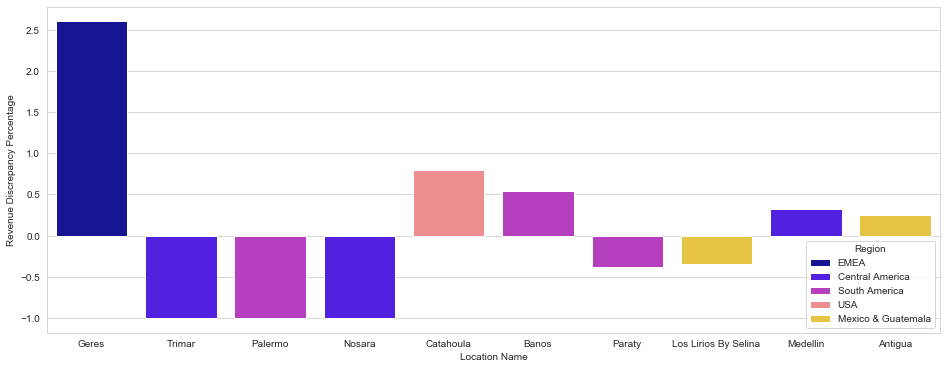

In [30]:
sns.set_palette('gnuplot2', 5)
plt.figure(figsize=(16, 6))
total_or = sns.barplot(x = df_percent_sort.index, y = df_percent_sort['Revenue Discrepancy Percentage'], hue = df_percent_sort['Region'], dodge = False)


In [14]:
# Create a df with the nominal difference between manually reported rev and actual rev
df_nom = df_man2 - df_act
df_nom

,Co-working,F&B Total,Miscellaneous Income,Retail Store,Rooms,Surf,Total Operating Revenue,Travel & Tours,Wellness
Location Name,,,,,,,,,
Candelaria,-0.002693,111.019802,3.314788,118.466630,-381.238270,0.000000,-249.513840,0.001346,-101.075439
Cartagena,0.000000,27.636662,0.000000,0.000000,382.766280,0.000000,410.402940,0.000000,0.000000
Chapinero,578.298724,-1263.253217,1012.257879,-80.320356,-1493.688790,0.000000,-1239.470450,0.000000,7.249306
Medellin,16.533794,1479.185128,-22.303652,22.119404,4208.905540,126.091826,5674.558860,-38.353970,-117.619209
Parque 93,38.487853,1381.640320,493.441485,51.127187,7732.430080,-329.558571,9395.387090,0.000000,27.818736
Quindio,0.000000,630.514214,114.642688,0.000000,-949.679128,0.000000,-204.522220,0.000000,0.000000
Villa de Leyva,0.000000,0.000000,45.661197,0.000000,0.000000,0.000000,45.661197,0.000000,0.000000
Jaco,0.000000,0.000000,0.000000,0.000000,-491.746210,0.000000,-491.746210,0.000000,0.000000
La Fortuna,-3161.333672,-4128.671266,0.000000,-127.585521,3711.329400,247.267053,-3480.648400,-132.917238,111.249451


In [15]:
df_nom["Abs Total Rev Discrepancy"] = df_nom['Total Operating Revenue'].abs()
df_nom['Region'] = df_percent['Region']
df_nom.rename(columns={'Total Operating Revenue': 'Total Revenue Discrepancy'}, inplace = True)
df_nom_sort = df_nom.sort_values(['Abs Total Rev Discrepancy', 'Location Name'], ascending = False)
df_nom_sort = df_nom_sort.iloc[:10,:]
df_nom_sort

,Co-working,F&B Total,Miscellaneous Income,Retail Store,Rooms,Surf,Total Revenue Discrepancy,Travel & Tours,Wellness,Abs Total Rev Discrepancy,Region
Location Name,,,,,,,,,,,
Geres,0.000000,130157.360620,-2235.073306,0.000000,545.17133,0.000000,128467.45865,0.000000,0.000000,128467.45865,EMEA
Banos,8.380596,29614.888741,0.000000,61.003475,1406.81016,0.000000,31091.08297,0.000000,0.000000,31091.08297,South America
Santa Teresa S,0.000000,20156.142550,0.000000,-156.189898,1166.98427,356.132779,21385.97980,-137.089931,0.000000,21385.97980,Central America
Paraty,-271.283109,-10366.752790,-395.418000,-7530.182225,-414.46396,-1749.197426,-21069.99312,0.000000,-342.695600,21069.99312,South America
Miami River,0.000000,265.586380,12852.170790,0.000000,-33111.69702,0.000000,-19993.93985,0.000000,0.000000,19993.93985,USA
Catahoula,-92.486394,-255.453292,14943.338970,-10.875492,-2796.59638,0.000000,11748.69076,0.000000,-39.236652,11748.69076,USA
Casco Viejo,0.000000,-25.957427,-11836.792130,-17.341422,147.70296,0.000000,-11732.38801,0.000000,0.000000,11732.38801,Central America
Parque 93,38.487853,1381.640320,493.441485,51.127187,7732.43008,-329.558571,9395.38709,0.000000,27.818736,9395.38709,Central America
Maderas,-85.180802,-4232.251930,635.693149,120.003791,-5589.19571,0.000000,-9075.18097,75.763930,0.000000,9075.18097,Central America


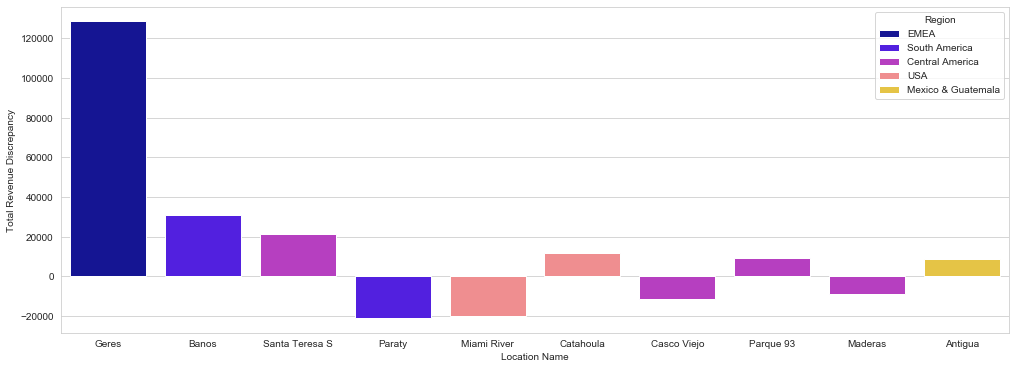

In [31]:
# Create a bar chart of the total differences
sns.set_palette('gnuplot2',5)
plt.figure(figsize=(17, 6))
total_nom = sns.barplot(x = df_nom_sort.index, y = df_nom_sort['Total Revenue Discrepancy'], hue = df_nom_sort['Region'], dodge = False)

In [17]:
df_geres = pd.DataFrame(df_nom_sort.loc["Geres"])
df_geres

,Geres
Co-working,0
F&B Total,130157
Miscellaneous Income,-2235.07
Retail Store,0
Rooms,545.171
Surf,0
Total Revenue Discrepancy,128467
Travel & Tours,0
Wellness,0
Abs Total Rev Discrepancy,128467


In [18]:
df_pl = pd.read_csv("Selina P&L.csv")
df_pl = df_pl.transpose()
df_pl.columns = df_pl.iloc[0,:]
df_pl = df_pl.iloc[1:,:-2]
df_pl.sort_index(inplace = True)
df_pl

Unnamed: 0,Total Occupied Beds,Available Beds,Rooms Revenue,Food & Beverage- General Revenue,Co-working Revenue,Travel & Tours Revenue,Surf Revenue,Wellness Revenue,Retail Store Revenue,Music Studio Revenue,Other Revenue,Total Global Revenue (All Dept) Revenue,Food & Beverage- General COGS,Administrative and General,Utilities,Labor Expense,Gross Operating Profit,EBITDA
138 Bowery ACT,0,0,66346.8,634.122,0,0,0,0,0,0,-1516.27,65464.6,435.413,30625.4,9039.6,50636.9,-18797.6,-37294.7
138 Bowery FOR,791.809,1569.85,48885.6,0,0,0,0,0,96.3942,0,3993.47,52975.5,0,8930.75,1879.69,16753,21694.3,2999.23
Amazon Tena ACT,334.367,4350.8,5444.73,2842.67,0,0,0,119.129,17.23,0,0,8423.76,1122.97,2750.2,1987.91,2627.2,-1817.48,-8536.43
Amazon Tena FOR,402.852,4188.32,5371.36,3086.85,0,0,0,0,0,0,0,8458.21,1080.4,2211.62,2559.46,2529.23,180.396,-13036.3
Antigua ACT,2328.82,5377.97,21367.4,13370.6,9.68835,0,33.4077,13.3636,201.214,0,1319.61,36315.3,4153.26,8166.05,8231.48,15585,-2442.54,-3824.71
Antigua FOR,4423.98,20370.7,21429.3,10327.7,1560.54,375.837,0,0,0,0,0,33693.3,2963.64,8374.29,6180.43,15420.6,-1913.21,-16111.5
Arequipa ACT,2452.68,14280.9,23447.7,2789.82,77.1923,0,0,0,134.693,0,0,26449.4,1746.26,7630.61,14535.4,11464.6,-14339.8,-89803.9
Arequipa FOR,2157.11,14968.3,25896.2,4739.29,406.746,0,0,0,0,0,0,31042.2,1168.44,8946.26,12280.5,13653.4,-8904.01,-83992.9
Astoria ACT,1528.66,4770.08,23642.3,113509,0,0,0,0,0,0,1559.08,138710,33480.8,15743.9,4600.2,74585.9,-14179.9,-76009.9
Astoria FOR,1951.27,3495.27,40308.6,164841,0,0,0,0,343.111,0,0,205492,43156.9,46228.4,7720,90542,8881.82,-116826


In [19]:
# Drop ACT and FOR from the index
df_pl.index = [index[:-3] for index in df_pl.index]
df_pl

Unnamed: 0,Total Occupied Beds,Available Beds,Rooms Revenue,Food & Beverage- General Revenue,Co-working Revenue,Travel & Tours Revenue,Surf Revenue,Wellness Revenue,Retail Store Revenue,Music Studio Revenue,Other Revenue,Total Global Revenue (All Dept) Revenue,Food & Beverage- General COGS,Administrative and General,Utilities,Labor Expense,Gross Operating Profit,EBITDA
138 Bowery,0,0,66346.8,634.122,0,0,0,0,0,0,-1516.27,65464.6,435.413,30625.4,9039.6,50636.9,-18797.6,-37294.7
138 Bowery,791.809,1569.85,48885.6,0,0,0,0,0,96.3942,0,3993.47,52975.5,0,8930.75,1879.69,16753,21694.3,2999.23
Amazon Tena,334.367,4350.8,5444.73,2842.67,0,0,0,119.129,17.23,0,0,8423.76,1122.97,2750.2,1987.91,2627.2,-1817.48,-8536.43
Amazon Tena,402.852,4188.32,5371.36,3086.85,0,0,0,0,0,0,0,8458.21,1080.4,2211.62,2559.46,2529.23,180.396,-13036.3
Antigua,2328.82,5377.97,21367.4,13370.6,9.68835,0,33.4077,13.3636,201.214,0,1319.61,36315.3,4153.26,8166.05,8231.48,15585,-2442.54,-3824.71
Antigua,4423.98,20370.7,21429.3,10327.7,1560.54,375.837,0,0,0,0,0,33693.3,2963.64,8374.29,6180.43,15420.6,-1913.21,-16111.5
Arequipa,2452.68,14280.9,23447.7,2789.82,77.1923,0,0,0,134.693,0,0,26449.4,1746.26,7630.61,14535.4,11464.6,-14339.8,-89803.9
Arequipa,2157.11,14968.3,25896.2,4739.29,406.746,0,0,0,0,0,0,31042.2,1168.44,8946.26,12280.5,13653.4,-8904.01,-83992.9
Astoria,1528.66,4770.08,23642.3,113509,0,0,0,0,0,0,1559.08,138710,33480.8,15743.9,4600.2,74585.9,-14179.9,-76009.9
Astoria,1951.27,3495.27,40308.6,164841,0,0,0,0,343.111,0,0,205492,43156.9,46228.4,7720,90542,8881.82,-116826


In [20]:
df_pl_actual = df_pl.iloc[::2, :]
df_pl_forecast = df_pl.iloc[1::2,:]

In [21]:
df_forecast_discrepancy = df_pl_actual - df_pl_forecast
df_forecast_discrepancy = df_forecast_discrepancy.astype(float)
df_forecast_discrepancy

Unnamed: 0,Total Occupied Beds,Available Beds,Rooms Revenue,Food & Beverage- General Revenue,Co-working Revenue,Travel & Tours Revenue,Surf Revenue,Wellness Revenue,Retail Store Revenue,Music Studio Revenue,Other Revenue,Total Global Revenue (All Dept) Revenue,Food & Beverage- General COGS,Administrative and General,Utilities,Labor Expense,Gross Operating Profit,EBITDA
138 Bowery,-791.80950,-1569.84840,17461.162110,634.122359,0.000000,0.000000,0.000000,0.000000,-96.394200,0.000000,-5509.740995,12489.149280,435.412601,21694.664441,7159.913305,33883.963290,-40491.890620,-40293.936871
Amazon Tena,-68.48484,162.48364,73.368749,-244.175311,0.000000,0.000000,0.000000,119.128708,17.229980,0.000000,0.000000,-34.447874,42.574137,538.575115,-571.550304,97.961425,-1997.875930,4499.834024
Antigua,-2095.16316,-14992.74488,-61.882830,3042.939770,-1550.853835,-375.836835,33.407719,13.363604,201.214409,0.000000,1319.605533,2621.957530,1189.623903,-208.236879,2051.050419,164.338640,-529.333951,12286.737951
Arequipa,295.56876,-687.40074,-2448.497030,-1949.475410,-329.553364,0.000000,0.000000,0.000000,134.692582,0.000000,0.000000,-4592.833220,577.828365,-1315.652080,2254.902210,-2188.757940,-5435.768262,-5811.084230
Astoria,-422.61228,1274.81064,-16666.256430,-51331.600400,0.000000,0.000000,0.000000,0.000000,-343.110960,0.000000,1559.078070,-66781.889700,-9676.096050,-30484.452260,-3119.797773,-15956.062790,-23061.706927,40816.135250
Athens,-1215.23480,-560.87760,-11691.878488,-927.303885,380.475719,0.000000,0.000000,0.000000,135.600408,0.000000,0.000000,-12103.106250,-148.687552,1191.747357,-888.647321,2331.160013,-13336.648099,-22002.963102
Atitlan,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,395.036743,-744.934779,419.674357,1112.609208,2122.739135
Aurora Sao Paulo,-1715.66336,-3207.78752,-33313.485340,-22125.212850,-164.946781,-11552.505860,0.000000,-2131.025739,-587.333880,0.000000,-166.839879,-70041.350280,8304.113842,-7470.627070,1126.834560,-3404.544220,-42654.585670,1675.047800
Banos,-520.59240,-793.66800,-24235.889960,-4159.918531,-16.650100,-408.094382,-352.170337,-453.438202,-520.260347,0.000000,0.000000,-30146.421870,-4148.383334,-2499.590416,1370.248259,2159.199230,-19032.900590,-16618.653808
Bariloche,-303.54792,412.05600,-11483.129910,-1979.122549,-160.230036,-3739.914411,0.000000,-800.274080,-666.234186,0.000000,-18.710501,-18847.615670,-957.521915,-409.434889,238.423843,-197.830108,-6169.234056,-6994.849296


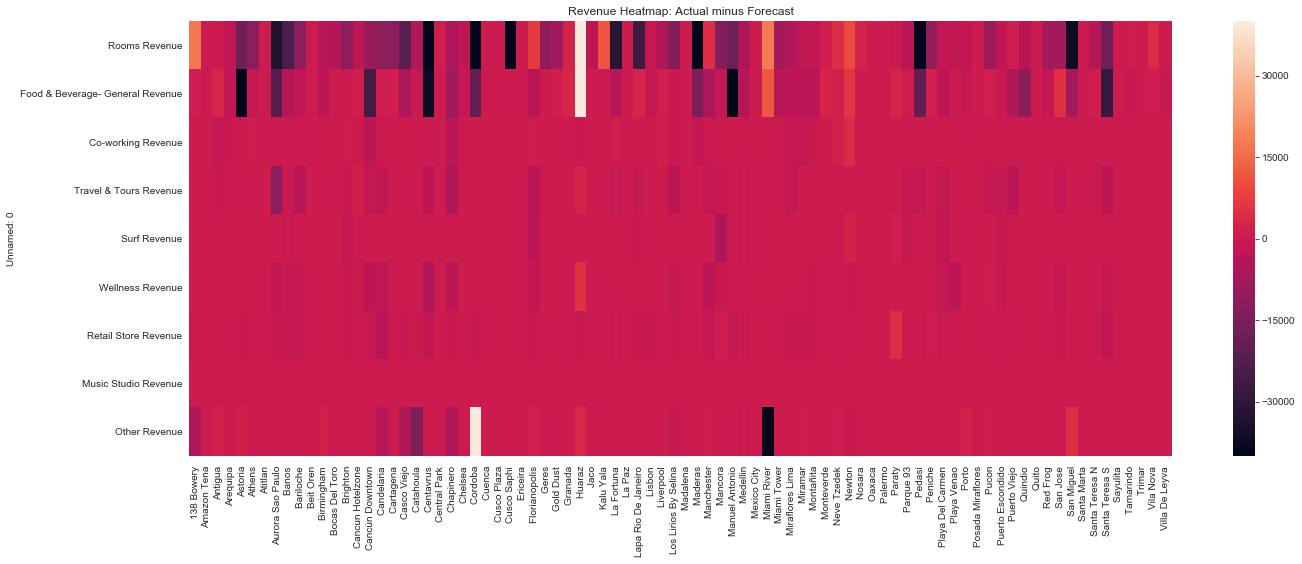

In [45]:
plt.figure(figsize=(22, 8))
sns.heatmap(df_forecast_discrepancy.drop(columns=["Total Occupied Beds", "Available Beds",  
                                                  "Total Global Revenue (All Dept) Revenue", "Gross Operating Profit", "EBITDA", "Food & Beverage- General COGS", 'Administrative and General', 'Utilities', 'Labor Expense']).transpose(), vmax = 40000, vmin = -40000).set_title("Revenue Heatmap: Actual minus Forecast")
plt.show()

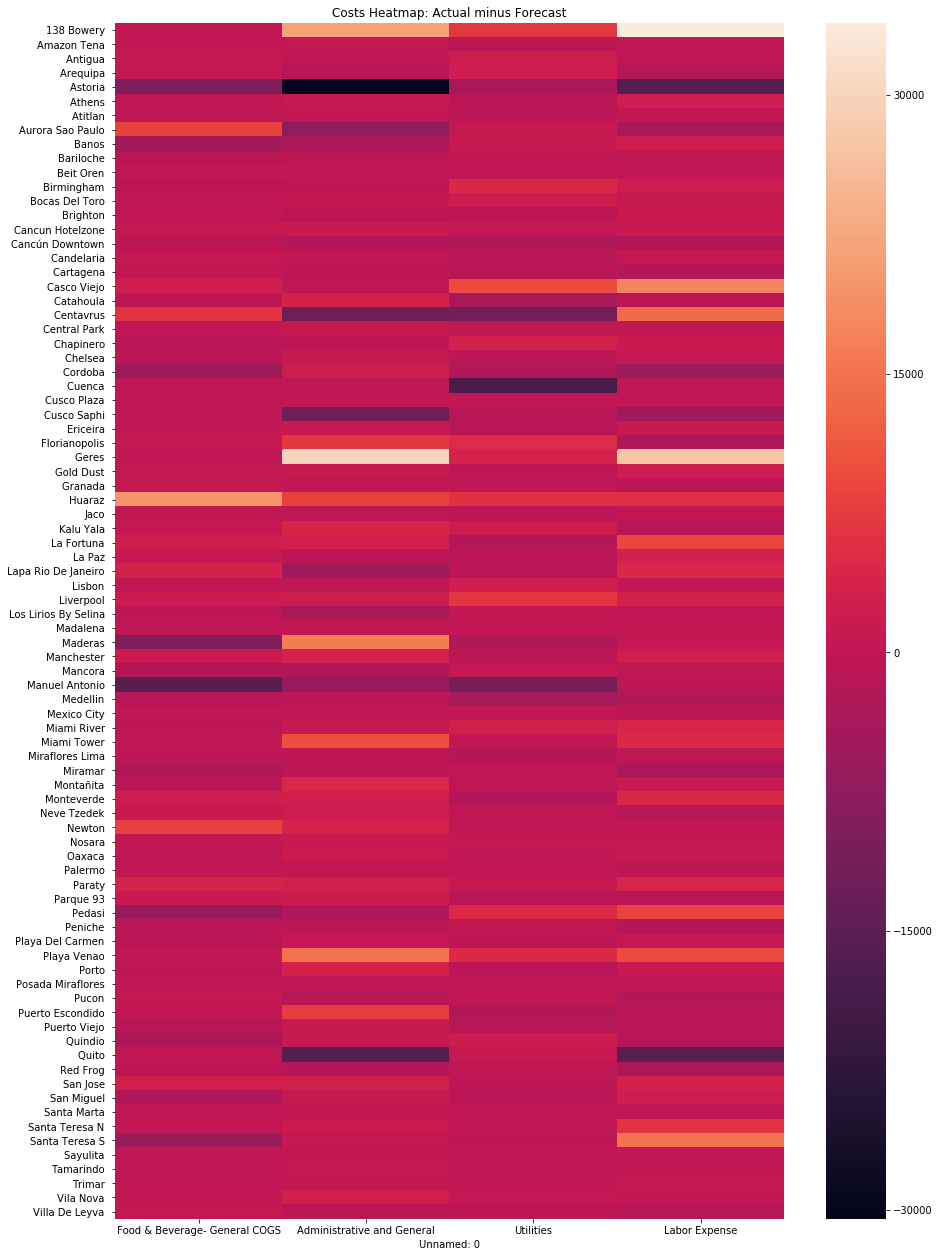

In [23]:
plt.figure(figsize=(15, 22))
sns.heatmap(df_forecast_discrepancy.iloc[:,12:-2]).set_title("Costs Heatmap: Actual minus Forecast")
plt.show()

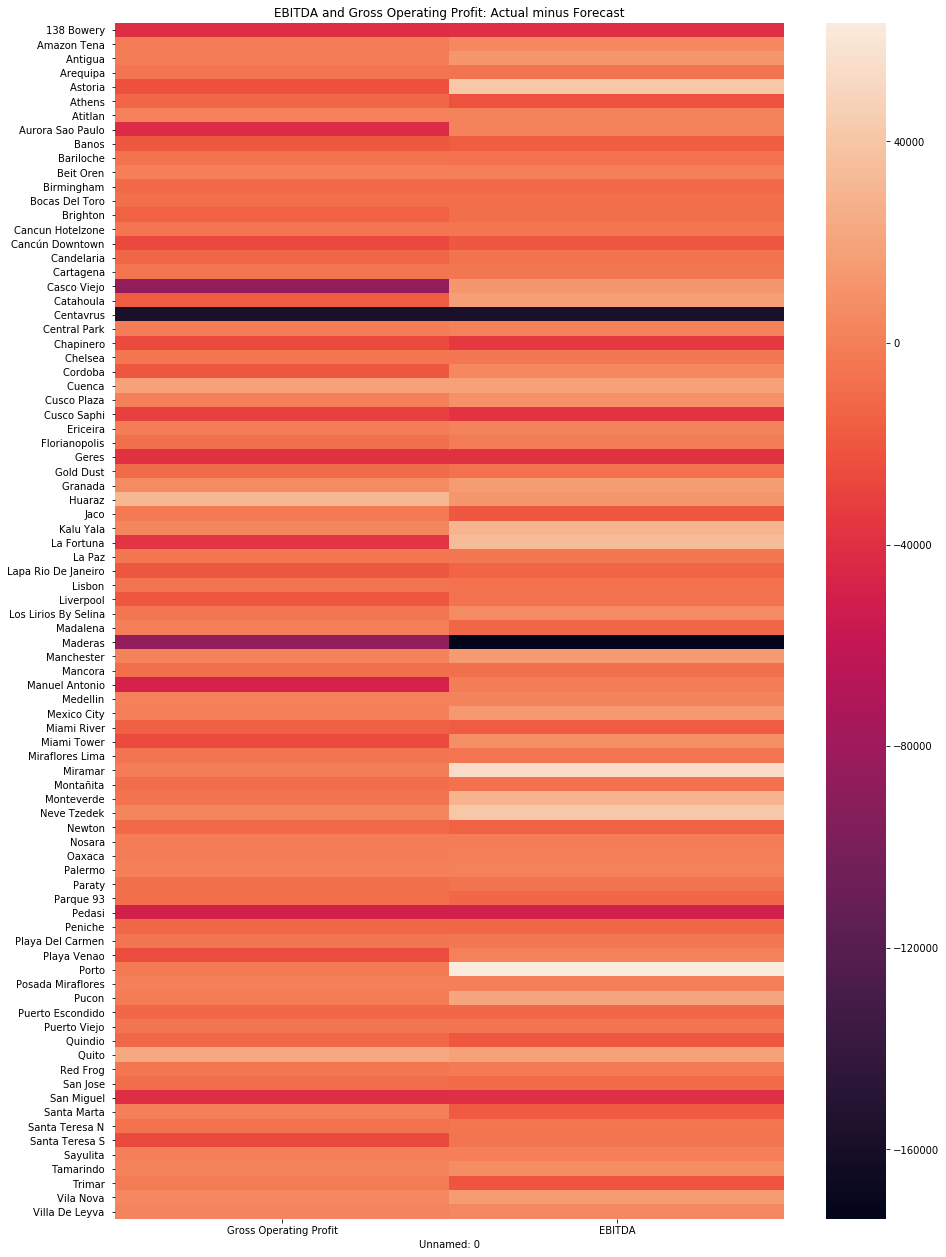

In [24]:

plt.figure(figsize=(15, 22))
sns.heatmap(df_forecast_discrepancy.iloc[:,-2:]).set_title("EBITDA and Gross Operating Profit: Actual minus Forecast")
plt.show()

In [25]:
df_pl_actual = df_pl_actual.astype(float)

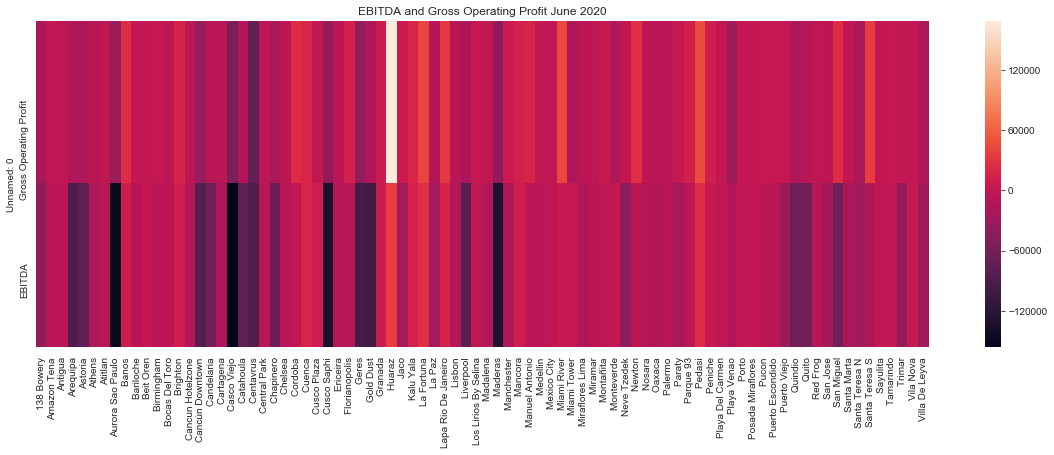

In [51]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_pl_actual.iloc[:,-2:].transpose()).set_title("EBITDA and Gross Operating Profit June 2020")
plt.show()

In [27]:
df_pl_actual

Unnamed: 0,Total Occupied Beds,Available Beds,Rooms Revenue,Food & Beverage- General Revenue,Co-working Revenue,Travel & Tours Revenue,Surf Revenue,Wellness Revenue,Retail Store Revenue,Music Studio Revenue,Other Revenue,Total Global Revenue (All Dept) Revenue,Food & Beverage- General COGS,Administrative and General,Utilities,Labor Expense,Gross Operating Profit,EBITDA
138 Bowery,0.00000,0.00000,66346.792110,634.122359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1516.266995,65464.647480,435.412601,30625.415050,9039.600205,50636.933600,-18797.585070,-37294.709420
Amazon Tena,334.36716,4350.80160,5444.728749,2842.674110,0.000000,0.000000,0.000000,119.128708,17.229980,0.000000,0.000000,8423.761547,1122.971435,2750.198091,1987.913479,2627.195289,-1817.480226,-8536.427166
Antigua,2328.81968,5377.97272,21367.389170,13370.601920,9.688355,0.000000,33.407719,13.363604,201.214409,0.000000,1319.605533,36315.270710,4153.262716,8166.048808,8231.480379,15584.955720,-2442.539405,-3824.714539
Arequipa,2452.67838,14280.85206,23447.664970,2789.819293,77.192256,0.000000,0.000000,0.000000,134.692582,0.000000,0.000000,26449.369100,1746.264976,7630.607837,14535.445230,11464.606480,-14339.776000,-89803.938960
Astoria,1528.65696,4770.07920,23642.307570,113508.979000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1559.078070,138710.364600,33480.798160,15743.930930,4600.198827,74585.937490,-14179.888910,-76009.907950
Athens,709.34520,9914.33640,6866.571512,2509.446115,380.475719,0.000000,0.000000,0.000000,135.600408,0.000000,962.290000,10854.383750,882.337448,6084.147260,2341.897679,10163.651990,-6343.181981,-15986.056370
Atitlan,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1020.893938,206.261576,2180.996214,-3494.037117,-4875.128452
Aurora Sao Paulo,4208.12544,19998.37568,49833.037800,15961.954890,15.561123,0.000000,0.000000,1659.640245,495.713544,0.000000,410.785414,68376.693020,14192.281670,16219.835300,23148.798850,27832.939840,-29744.444500,-149389.418500
Banos,1512.00480,1869.82800,47556.088840,8823.528659,45.319788,0.000000,0.000000,0.000000,772.038529,0.000000,0.000000,57196.975810,6238.374416,4568.595144,4353.871630,8489.781848,24837.884450,8132.153702
Bariloche,1185.34776,6016.01760,13075.407690,6095.087026,35.221173,76.046308,0.000000,0.000000,167.750745,0.000000,168.850934,19618.363880,1464.740957,5579.262963,1762.584649,6059.934528,1202.529122,-6543.785792


In [28]:
foodcost = pd.DataFrame(df_pl_actual['Food & Beverage- General COGS'] / df_pl_actual['Food & Beverage- General Revenue'])
foodcost.columns = ['Food Cost Percentage']
#foodcost.sort_values(by = 'Food Cost', inplace = True)
foodcost["Food Cost"] = df_pl_actual['Food & Beverage- General COGS']
foodcost["Food Revenue Forecast Error"] = df_forecast_discrepancy['Food & Beverage- General Revenue']
foodcost['F&B Revenue'] = df_pl_actual['Food & Beverage- General Revenue']
foodcost = foodcost.replace([np.inf, -np.inf], np.nan)
foodcost

,Food Cost Percentage,Food Cost,Food Revenue Forecast Error,F&B Revenue
138 Bowery,0.686638,435.412601,634.122359,634.122359
Amazon Tena,0.395041,1122.971435,-244.175311,2842.674110
Antigua,0.310626,4153.262716,3042.939770,13370.601920
Arequipa,0.625942,1746.264976,-1949.475410,2789.819293
Astoria,0.294962,33480.798160,-51331.600400,113508.979000
Athens,0.351606,882.337448,-927.303885,2509.446115
Atitlan,NaN,0.000000,0.000000,0.000000
Aurora Sao Paulo,0.889132,14192.281670,-22125.212850,15961.954890
Banos,0.707016,6238.374416,-4159.918531,8823.528659
Bariloche,0.240315,1464.740957,-1979.122549,6095.087026


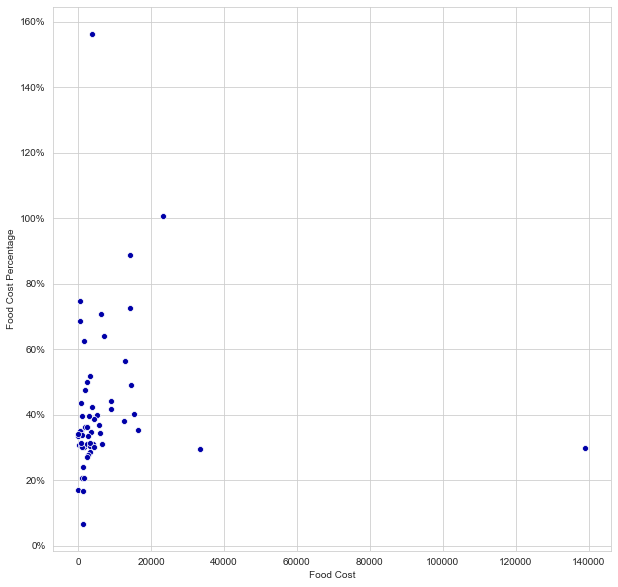

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
food_plot = sns.scatterplot(x = foodcost['Food Cost'], y = foodcost['Food Cost Percentage'])
#labor_plot.set_title("Total Food Cost vs Food Cost Percentage")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
           

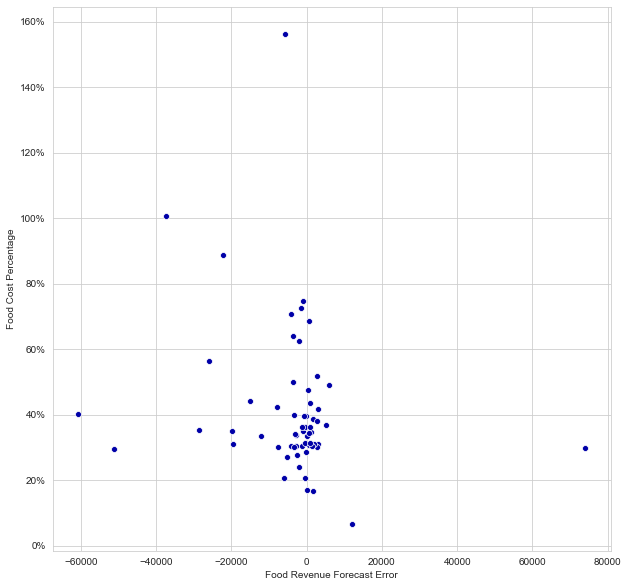

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
food_plot = sns.scatterplot(x = foodcost['Food Revenue Forecast Error'], y = foodcost['Food Cost Percentage'], cmap = 'cool')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [52]:
import plotly.express as px

In [57]:
fig = px.scatter(foodcost, x = 'Food Revenue Forecast Error', y='Food Cost Percentage', color = foodcost.index)
fig.show()

C:\Users\ktkuw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ktkuw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


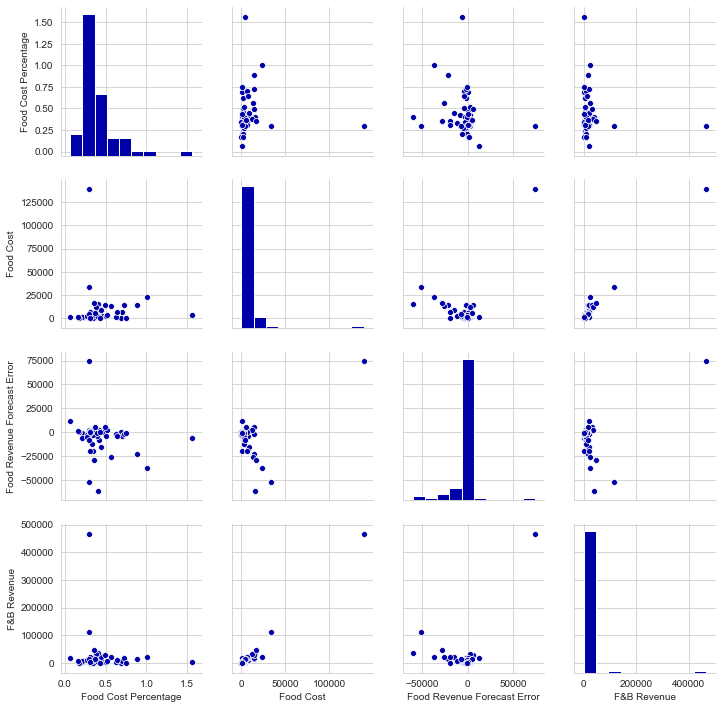

In [34]:
sns.pairplot(foodcost)

In [35]:
laborcost = pd.DataFrame(df_pl_actual['Labor Expense'] / df_pl_actual['Total Global Revenue (All Dept) Revenue'])
laborcost.columns = ['Labor Cost Percentage']
# laborcost.sort_values(by = 'Labor Cost Percentage', inplace = True)

laborcost['Labor Cost'] = df_pl_actual['Labor Expense']
laborcost['Revenue Forecast Error'] = df_forecast_discrepancy['Total Global Revenue (All Dept) Revenue']

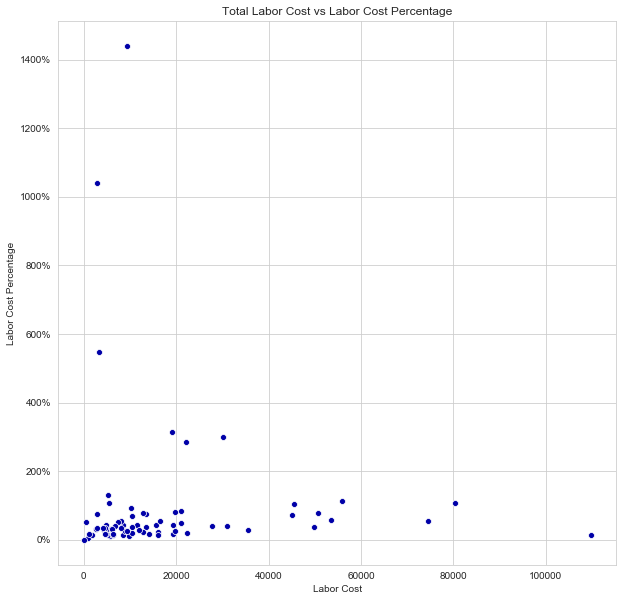

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
labor_plot = sns.scatterplot(x = laborcost['Labor Cost'], y = laborcost['Labor Cost Percentage'])
labor_plot.set_title("Total Labor Cost vs Labor Cost Percentage")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
                                    

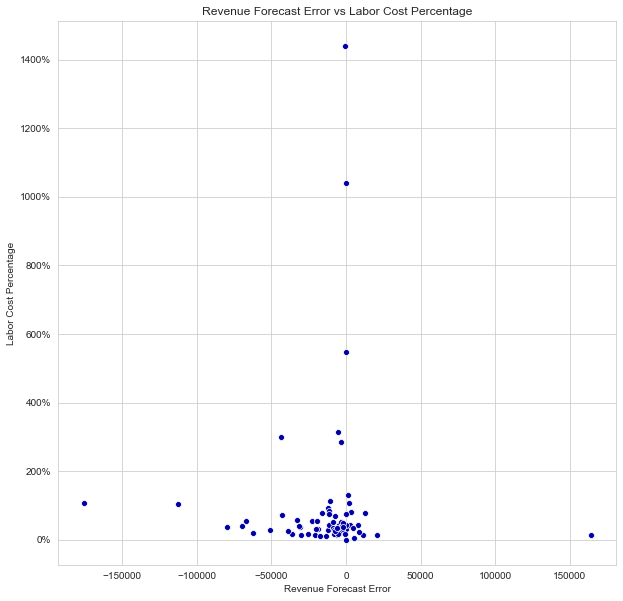

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
labor_plot = sns.scatterplot(x = laborcost['Revenue Forecast Error'], y = laborcost['Labor Cost Percentage'])
labor_plot.set_title("Revenue Forecast Error vs Labor Cost Percentage")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [58]:
fig = px.scatter(laborcost, x = 'Revenue Forecast Error', y='Labor Cost Percentage', color = laborcost.index)
fig.show()